<a href="https://colab.research.google.com/github/hyphen-ani/natural_language_processing/blob/main/Natural_Language_Processing_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
# Dowloading twitter samples
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
#Selecting all the set of positive & negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print("Number Of positive tweets: ", len(all_positive_tweets))
print("Number Of negative tweets: ", len(all_negative_tweets))

print("\nThe type of all_positive_tweets is: ", type(all_positive_tweets[0]))
print("The type of a tweet entry is: ", type(all_negative_tweets))

Number Of positive tweets:  5000
Number Of negative tweets:  5000

The type of all_positive_tweets is:  <class 'str'>
The type of a tweet entry is:  <class 'list'>


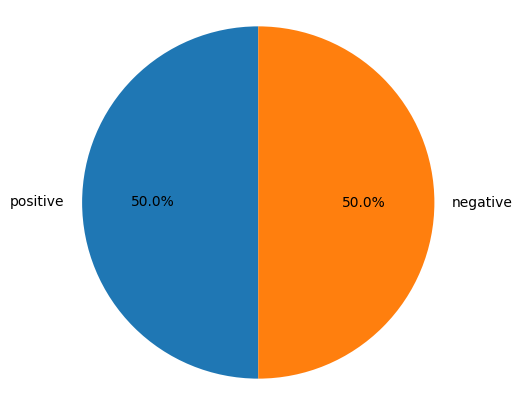

In [14]:
# Representation Of a Figure

fig = plt.figure(figsize=(5,5))

labels = 'positive', 'negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [19]:
# print positive in green
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@Immanu3 thank you :)
@GabyWhittlenew no way!!!! Aww :( such a funny time that


### Preprocess raw text for Sentiment Analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [33]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [26]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import re     # library for regular expression operations
import string # for string operations

from nltk.corpus import stopwords         # module for stopwords
from nltk.stem import PorterStemmer       # module for stemming
from nltk.tokenize import TweetTokenizer  # module for tokenizing string

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [34]:
print('\033[92m' + tweet)
print('\033[94m')

# removing old style retweet text "RT"

tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# removing hyperlinks

tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# removing '#' symbol

tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


###Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:

In [35]:
print('\033[92m' + tweet2)
print('\033[94m')

#instiatiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

#tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print('Tokenized String: ')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenized String: 
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


###Removing Stop Words & Punctuations

In [36]:
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [39]:
print('\033[92m')
print(tweet_tokens)
print('\033[94m')
tweets_clean = []

for word in tweet_tokens:
  if (word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print(tweets_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


###Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

* learn
* learning
* learned
* learnt

All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

* happy
* happiness
* happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.



In [40]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

print('Stemmed Words')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Stemmed Words
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


###Process_Tweets `process_tweet()`